In [10]:
import numpy as np
import matplotlib.pyplot as plt

INI_HEAT=273
MAX_HEAT=400

TARGET_TEMP=350
TARGET_INDEX=20


#point_heat_init[-1]=1000
def ini_data():
    return np.ones(100)*INI_HEAT

def _transfer(data):
    diff=np.diff(data)
    #point_heat[:-1]+=diff*0.05
    data[1:]-=diff*0.03
    
    data[:]-=(data-INI_HEAT)*0.0001
    return data
    
def heat(data):
    data[0]+=(MAX_HEAT-data[0])*0.001
    data = _transfer(data)
    return data

def cool(data):
    data = _transfer(data)
    return data

In [11]:
def PID(Kp, Ki, Kd, MV_bar=0):
    # initialize stored data
    e_prev = 0
    t_prev = -100
    I = 0
    
    # initial control
    MV = MV_bar
    
    while True:
        # yield MV, wait for new t, PV, SP
        t, PV, SP = yield MV
        
        # PID calculations
        e = SP - PV
        
        P = Kp*e
        I = I + Ki*e*(t - t_prev)
        D = Kd*(e - e_prev)/(t - t_prev)
        
        MV = MV_bar + P + I + D
        
        # update stored data for next iteration
        e_prev = e
        t_prev = t



In [14]:
controller = PID(100, 0.01, 10) 
controller.send(None)
point_heat=ini_data()

heat_up=[point_heat.copy()]
for t in range(10000):
    MV = controller.send([t, point_heat[TARGET_INDEX], TARGET_TEMP])
    if MV>0:
        heat(point_heat)
    else:
        cool(point_heat)
    if t%10==0:
        heat_up.append(point_heat.copy())
heat_up=np.array(heat_up)

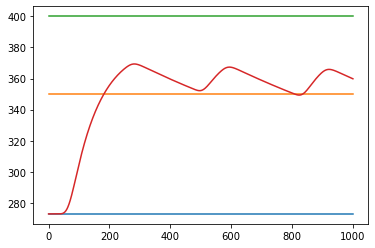

In [15]:
plt.plot(np.ones_like(heat_up[:,TARGET_INDEX])*INI_HEAT)
plt.plot(np.ones_like(heat_up[:,TARGET_INDEX])*TARGET_TEMP)
plt.plot(np.ones_like(heat_up[:,TARGET_INDEX])*MAX_HEAT)
plt.plot(heat_up[:,TARGET_INDEX])

In [ ]:
from IPython.core.display import clear_output
min_r=np.ones_like(point_heat)*INI_HEAT
target_r=np.ones_like(point_heat)*TARGET_TEMP
max_r=np.ones_like(point_heat)*MAX_HEAT
for i in range(len(heat_up)):
    clear_output(wait=True)
    plt.plot(heat_up[i])
    plt.plot(min_r)
    plt.plot(target_r)
    plt.plot(max_r)
    plt.plot([TARGET_INDEX,TARGET_INDEX],[INI_HEAT,MAX_HEAT])
    plt.show()
    plt.close()
 #   break

In [197]:
TARGET_INDEX

20

[I 2021-04-08 15:55:16,507] A new study created in memory with name: no-name-405ec545-05ad-41a5-a868-2fe0c5b453af


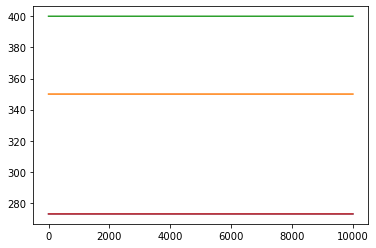

[I 2021-04-08 15:55:17,555] Trial 0 finished with value: 770077.0 and parameters: {'Kp': 84.52184822921774, 'Ki': -37.17517819079954, 'Kd': -6.684107408537827}. Best is trial 0 with value: 770077.0.
[I 2021-04-08 15:55:18,508] Trial 1 finished with value: 770077.0 and parameters: {'Kp': 8.762560203073818, 'Ki': -43.71152877075672, 'Kd': -1.2931548866862244}. Best is trial 0 with value: 770077.0.


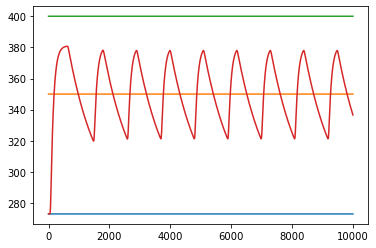

[I 2021-04-08 15:55:19,585] Trial 2 finished with value: 167525.94845418018 and parameters: {'Kp': -92.12667874791252, 'Ki': 19.800145322214902, 'Kd': -61.7944741885454}. Best is trial 2 with value: 167525.94845418018.
[I 2021-04-08 15:55:20,541] Trial 3 finished with value: 770077.0 and parameters: {'Kp': -35.448748311821745, 'Ki': -60.30975923731117, 'Kd': 62.170332630193144}. Best is trial 2 with value: 167525.94845418018.
[I 2021-04-08 15:55:21,628] Trial 4 finished with value: 770077.0 and parameters: {'Kp': 69.94998011506965, 'Ki': -36.96686458539307, 'Kd': 48.1802742648473}. Best is trial 2 with value: 167525.94845418018.


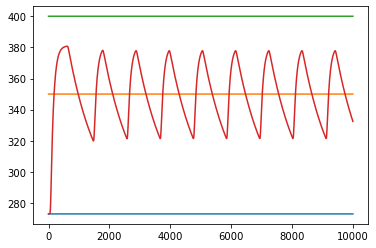

[I 2021-04-08 15:55:22,813] Trial 5 finished with value: 166595.39549602813 and parameters: {'Kp': 76.72337198649305, 'Ki': 9.228289147472196, 'Kd': 41.135234287326426}. Best is trial 5 with value: 166595.39549602813.
[I 2021-04-08 15:55:23,784] Trial 6 finished with value: 166933.19577848312 and parameters: {'Kp': 46.49537280040681, 'Ki': 14.925220482692666, 'Kd': 64.98387721922938}. Best is trial 5 with value: 166595.39549602813.
[I 2021-04-08 15:55:24,847] Trial 7 finished with value: 770077.0 and parameters: {'Kp': -2.1443267605491485, 'Ki': -75.76404114733919, 'Kd': 68.88297714166822}. Best is trial 5 with value: 166595.39549602813.
[I 2021-04-08 15:55:25,915] Trial 8 finished with value: 770077.0 and parameters: {'Kp': 45.07650478677371, 'Ki': -52.168670281761756, 'Kd': -79.5757273570753}. Best is trial 5 with value: 166595.39549602813.
[I 2021-04-08 15:55:26,884] Trial 9 finished with value: 770077.0 and parameters: {'Kp': -42.90898710913487, 'Ki': -10.699776289521239, 'Kd': -70

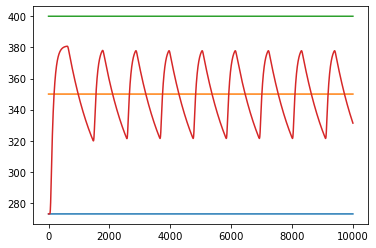

[I 2021-04-08 15:55:41,881] Trial 23 finished with value: 166390.6218526153 and parameters: {'Kp': 81.16949102388487, 'Ki': 6.82956469910398, 'Kd': 36.83971885153457}. Best is trial 23 with value: 166390.6218526153.
[I 2021-04-08 15:55:42,971] Trial 24 finished with value: 683815.390774376 and parameters: {'Kp': 78.79115215064887, 'Ki': -0.024959915851857417, 'Kd': 13.96765260559065}. Best is trial 23 with value: 166390.6218526153.
[I 2021-04-08 15:55:43,919] Trial 25 finished with value: 770077.0 and parameters: {'Kp': 98.8917666140318, 'Ki': -23.122343304221175, 'Kd': 51.83614389287138}. Best is trial 23 with value: 166390.6218526153.
[I 2021-04-08 15:55:45,038] Trial 26 finished with value: 167110.7726982776 and parameters: {'Kp': 23.10944288542494, 'Ki': 38.31828361523878, 'Kd': 33.94107753952625}. Best is trial 23 with value: 166390.6218526153.
[I 2021-04-08 15:55:46,008] Trial 27 finished with value: 166495.28503982388 and parameters: {'Kp': 83.40273732506598, 'Ki': 8.25521316030

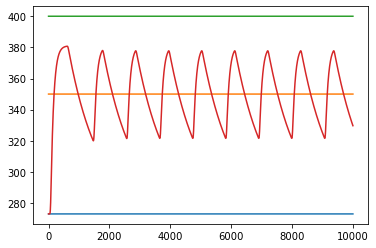

[I 2021-04-08 15:55:47,055] Trial 28 finished with value: 166115.17083248144 and parameters: {'Kp': 60.01853872810319, 'Ki': 3.4654295824529653, 'Kd': 9.61038757375265}. Best is trial 28 with value: 166115.17083248144.
[I 2021-04-08 15:55:48,038] Trial 29 finished with value: 770077.0 and parameters: {'Kp': 89.76946420679997, 'Ki': -30.024817691365815, 'Kd': -13.676551667738686}. Best is trial 28 with value: 166115.17083248144.
[I 2021-04-08 15:55:49,105] Trial 30 finished with value: 167096.326501158 and parameters: {'Kp': 57.93531763425199, 'Ki': 65.440261964961, 'Kd': 15.153893067174813}. Best is trial 28 with value: 166115.17083248144.
[I 2021-04-08 15:55:50,123] Trial 31 finished with value: 166402.37187887946 and parameters: {'Kp': 83.7961066193645, 'Ki': 7.240530906466674, 'Kd': 8.430374527302707}. Best is trial 28 with value: 166115.17083248144.
[I 2021-04-08 15:55:51,196] Trial 32 finished with value: 770077.0 and parameters: {'Kp': 86.95842242586184, 'Ki': -8.035632354441455,

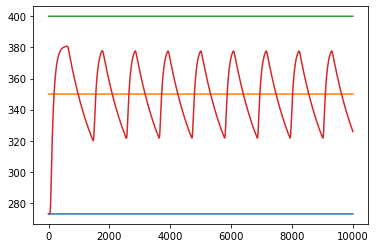

[I 2021-04-08 15:55:53,452] Trial 34 finished with value: 165652.9432990614 and parameters: {'Kp': 85.43506032743309, 'Ki': 2.831301346706015, 'Kd': -38.420885254902984}. Best is trial 34 with value: 165652.9432990614.
[I 2021-04-08 15:55:54,529] Trial 35 finished with value: 770077.0 and parameters: {'Kp': 34.508222162385714, 'Ki': -37.762401854314106, 'Kd': -46.00629242962215}. Best is trial 34 with value: 165652.9432990614.
[I 2021-04-08 15:55:55,647] Trial 36 finished with value: 165667.93182394563 and parameters: {'Kp': 54.62964348206425, 'Ki': 1.8468061127303672, 'Kd': -14.291852930961905}. Best is trial 34 with value: 165652.9432990614.
[I 2021-04-08 15:55:56,611] Trial 37 finished with value: 770077.0 and parameters: {'Kp': 11.64764100698441, 'Ki': -3.5639260974816356, 'Kd': -17.198792791034204}. Best is trial 34 with value: 165652.9432990614.
[I 2021-04-08 15:55:57,596] Trial 38 finished with value: 167049.7774196026 and parameters: {'Kp': 53.39474085738193, 'Ki': 34.324140699

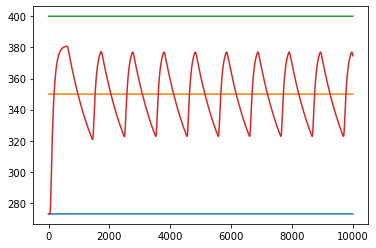

[I 2021-04-08 15:56:12,224] Trial 52 finished with value: 162331.07620299738 and parameters: {'Kp': 98.6792873237433, 'Ki': 0.9905938981978659, 'Kd': -23.28874880552556}. Best is trial 52 with value: 162331.07620299738.
[I 2021-04-08 15:56:13,303] Trial 53 finished with value: 770077.0 and parameters: {'Kp': 98.84690206849868, 'Ki': -6.727378780906247, 'Kd': -24.624452019237562}. Best is trial 52 with value: 162331.07620299738.
[I 2021-04-08 15:56:14,388] Trial 54 finished with value: 166984.60734504106 and parameters: {'Kp': 73.87507433196797, 'Ki': 30.35333428007911, 'Kd': -4.000981729014995}. Best is trial 52 with value: 162331.07620299738.
[I 2021-04-08 15:56:15,358] Trial 55 finished with value: 165076.63153870348 and parameters: {'Kp': 99.7315588339714, 'Ki': 1.8218493139636371, 'Kd': -56.033630618377195}. Best is trial 52 with value: 162331.07620299738.
[I 2021-04-08 15:56:16,415] Trial 56 finished with value: 165447.6850313531 and parameters: {'Kp': 57.80060236035918, 'Ki': 1.3

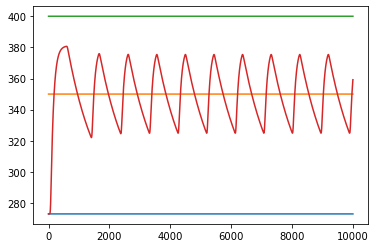

[I 2021-04-08 15:57:23,467] Trial 119 finished with value: 150762.28666904528 and parameters: {'Kp': 77.80176272447919, 'Ki': 0.3519994329355731, 'Kd': -3.2981303313864014}. Best is trial 119 with value: 150762.28666904528.
[I 2021-04-08 15:57:24,559] Trial 120 finished with value: 770077.0 and parameters: {'Kp': 80.84011269390463, 'Ki': -92.28541327202895, 'Kd': 5.355856764288507}. Best is trial 119 with value: 150762.28666904528.
[I 2021-04-08 15:57:25,667] Trial 121 finished with value: 162831.94913806327 and parameters: {'Kp': 76.78146975733507, 'Ki': 1.0120593732118217, 'Kd': -4.224744412885079}. Best is trial 119 with value: 150762.28666904528.
[I 2021-04-08 15:57:26,632] Trial 122 finished with value: 767839.6854393351 and parameters: {'Kp': 75.21772864491358, 'Ki': -0.6322775924539732, 'Kd': -3.4912611018201076}. Best is trial 119 with value: 150762.28666904528.
[I 2021-04-08 15:57:27,709] Trial 123 finished with value: 770077.0 and parameters: {'Kp': 85.01883556526084, 'Ki': -

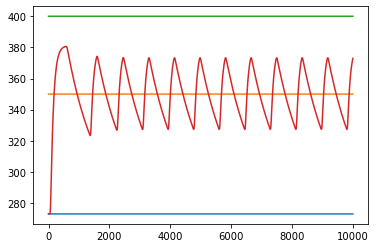

[I 2021-04-08 15:58:23,920] Trial 176 finished with value: 139143.98375083145 and parameters: {'Kp': 79.7318826288166, 'Ki': 0.22872713142403067, 'Kd': 24.0058321469037}. Best is trial 176 with value: 139143.98375083145.
[I 2021-04-08 15:58:25,031] Trial 177 finished with value: 166318.07164387003 and parameters: {'Kp': 79.86039453883424, 'Ki': 6.040902908326192, 'Kd': 22.476517609473067}. Best is trial 176 with value: 139143.98375083145.
[I 2021-04-08 15:58:26,122] Trial 178 finished with value: 166606.0441622007 and parameters: {'Kp': 77.10428183024136, 'Ki': 9.562925394161333, 'Kd': 32.31308487700396}. Best is trial 176 with value: 139143.98375083145.
[I 2021-04-08 15:58:27,194] Trial 179 finished with value: 770077.0 and parameters: {'Kp': 90.43547706529408, 'Ki': -1.8511523778517933, 'Kd': 3.594342274514993}. Best is trial 176 with value: 139143.98375083145.
[I 2021-04-08 15:58:28,173] Trial 180 finished with value: 770077.0 and parameters: {'Kp': 85.04841109708636, 'Ki': -8.60841

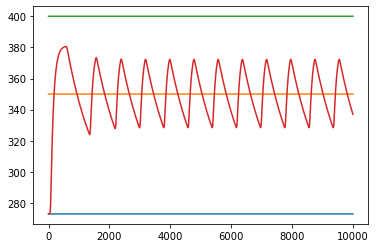

[I 2021-04-08 15:59:01,543] Trial 212 finished with value: 132555.89801157115 and parameters: {'Kp': 84.34640277355672, 'Ki': 0.2088505254180862, 'Kd': 41.16068335094528}. Best is trial 212 with value: 132555.89801157115.
[I 2021-04-08 15:59:02,647] Trial 213 finished with value: 162460.4672229108 and parameters: {'Kp': 82.61038749574448, 'Ki': 0.9337123174562614, 'Kd': 41.336339780594}. Best is trial 212 with value: 132555.89801157115.
[I 2021-04-08 15:59:03,641] Trial 214 finished with value: 770077.0 and parameters: {'Kp': 87.23617089093115, 'Ki': -2.2688781891594707, 'Kd': 44.50893933189592}. Best is trial 212 with value: 132555.89801157115.
[I 2021-04-08 15:59:04,707] Trial 215 finished with value: 166112.19015478413 and parameters: {'Kp': 85.03563729142738, 'Ki': 4.860114824500817, 'Kd': 52.75563375854796}. Best is trial 212 with value: 132555.89801157115.
[I 2021-04-08 15:59:05,785] Trial 216 finished with value: 166606.0441622007 and parameters: {'Kp': 91.88199276423177, 'Ki': 

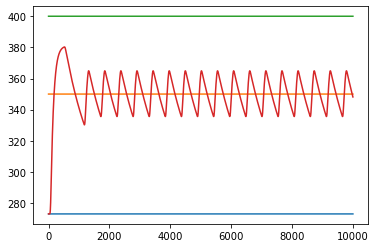

[I 2021-04-08 16:00:57,471] Trial 324 finished with value: 95932.02185944092 and parameters: {'Kp': 94.43784768284426, 'Ki': 0.09865381583934296, 'Kd': 29.90061228473937}. Best is trial 324 with value: 95932.02185944092.
[I 2021-04-08 16:00:58,458] Trial 325 finished with value: 770077.0 and parameters: {'Kp': 96.48572138061004, 'Ki': -3.530321474832208, 'Kd': 47.72464355260156}. Best is trial 324 with value: 95932.02185944092.
[I 2021-04-08 16:00:59,542] Trial 326 finished with value: 166021.54058748385 and parameters: {'Kp': 98.95137443119883, 'Ki': 5.089906478649031, 'Kd': 35.97701391799662}. Best is trial 324 with value: 95932.02185944092.
[I 2021-04-08 16:01:00,638] Trial 327 finished with value: 761486.8309154655 and parameters: {'Kp': 94.59402445246526, 'Ki': -0.5434493742099699, 'Kd': 15.476013307785143}. Best is trial 324 with value: 95932.02185944092.
[I 2021-04-08 16:01:01,720] Trial 328 finished with value: 770077.0 and parameters: {'Kp': 92.01500538136037, 'Ki': -10.491023

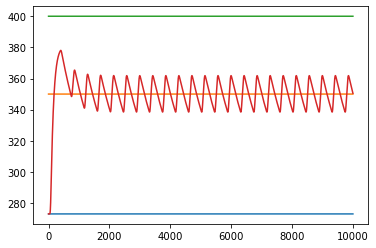

[I 2021-04-08 16:01:44,026] Trial 368 finished with value: 77454.7995447819 and parameters: {'Kp': 57.999456086134096, 'Ki': 0.022909112923719777, 'Kd': 23.67721792122987}. Best is trial 368 with value: 77454.7995447819.
[I 2021-04-08 16:01:44,972] Trial 369 finished with value: 770077.0 and parameters: {'Kp': 58.020220491663764, 'Ki': -3.1308432636330625, 'Kd': 20.948944729065442}. Best is trial 368 with value: 77454.7995447819.
[I 2021-04-08 16:01:46,081] Trial 370 finished with value: 164102.2393730583 and parameters: {'Kp': 65.96335946029704, 'Ki': 1.0667568133475496, 'Kd': 24.75478419716777}. Best is trial 368 with value: 77454.7995447819.
[I 2021-04-08 16:01:47,197] Trial 371 finished with value: 166532.01488915773 and parameters: {'Kp': 61.7258269232779, 'Ki': 6.553716197287658, 'Kd': 26.921767109135168}. Best is trial 368 with value: 77454.7995447819.
[I 2021-04-08 16:01:48,262] Trial 372 finished with value: 770077.0 and parameters: {'Kp': 49.08209520518406, 'Ki': -5.614651370

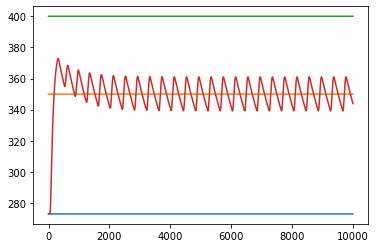

[I 2021-04-08 16:05:12,892] Trial 568 finished with value: 72104.983522244 and parameters: {'Kp': 83.81948109421238, 'Ki': 0.015590753284061565, 'Kd': 15.161142631787186}. Best is trial 568 with value: 72104.983522244.
[I 2021-04-08 16:05:13,969] Trial 569 finished with value: 770077.0 and parameters: {'Kp': 85.22854074537092, 'Ki': -1.8461938307802297, 'Kd': 16.500922745305544}. Best is trial 568 with value: 72104.983522244.
[I 2021-04-08 16:05:15,059] Trial 570 finished with value: 166580.0862302508 and parameters: {'Kp': 88.50830246796207, 'Ki': 10.293470916752337, 'Kd': 13.356368239216637}. Best is trial 568 with value: 72104.983522244.
[I 2021-04-08 16:05:16,143] Trial 571 finished with value: 770077.0 and parameters: {'Kp': 92.54269133364488, 'Ki': -5.581824776571936, 'Kd': 14.814303932794457}. Best is trial 568 with value: 72104.983522244.
[I 2021-04-08 16:05:17,146] Trial 572 finished with value: 165484.92855685495 and parameters: {'Kp': 96.16272327327097, 'Ki': 2.4786219801079

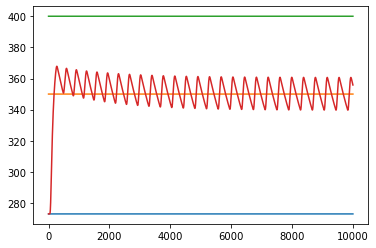

[I 2021-04-08 16:32:40,619] Trial 2102 finished with value: 68769.13978580432 and parameters: {'Kp': 95.53370606447045, 'Ki': 0.006399917444679271, 'Kd': 26.964031001715036}. Best is trial 2102 with value: 68769.13978580432.
[I 2021-04-08 16:32:41,688] Trial 2103 finished with value: 770077.0 and parameters: {'Kp': 99.86389551534354, 'Ki': -6.15223783366262, 'Kd': 27.21312515108828}. Best is trial 2102 with value: 68769.13978580432.
[I 2021-04-08 16:32:42,773] Trial 2104 finished with value: 738869.7687553624 and parameters: {'Kp': 96.32842784997715, 'Ki': -0.23844584328502672, 'Kd': 23.236187799287997}. Best is trial 2102 with value: 68769.13978580432.
[I 2021-04-08 16:32:43,870] Trial 2105 finished with value: 770077.0 and parameters: {'Kp': 99.98126411922831, 'Ki': -57.090151289345826, 'Kd': 24.17789189193347}. Best is trial 2102 with value: 68769.13978580432.
[I 2021-04-08 16:32:44,963] Trial 2106 finished with value: 770077.0 and parameters: {'Kp': 91.72651595728634, 'Ki': -13.483

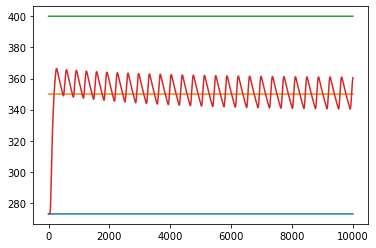

[I 2021-04-08 16:39:28,057] Trial 2476 finished with value: 67516.28830029187 and parameters: {'Kp': 99.99917814314918, 'Ki': 0.003640741145438596, 'Kd': 19.020855114318856}. Best is trial 2476 with value: 67516.28830029187.
[I 2021-04-08 16:39:29,154] Trial 2477 finished with value: 770077.0 and parameters: {'Kp': 96.5959917409085, 'Ki': -3.0379486644063145, 'Kd': 21.9548682565097}. Best is trial 2476 with value: 67516.28830029187.
[I 2021-04-08 16:39:30,303] Trial 2478 finished with value: 165409.27841204216 and parameters: {'Kp': 96.42264800553983, 'Ki': 1.9922805129958188, 'Kd': 20.892721336041504}. Best is trial 2476 with value: 67516.28830029187.
[I 2021-04-08 16:39:31,414] Trial 2479 finished with value: 166576.14494701143 and parameters: {'Kp': 86.88162098104954, 'Ki': 10.089026477304635, 'Kd': 18.621489044674046}. Best is trial 2476 with value: 67516.28830029187.
[I 2021-04-08 16:39:32,383] Trial 2480 finished with value: 770077.0 and parameters: {'Kp': 99.86288281878238, 'Ki'

In [20]:
import optuna
best=[10000000000000]
def objective(trial):
    Kp = trial.suggest_float("Kp",-100,100)
    Ki = trial.suggest_float("Ki",-100,100)
    Kd = trial.suggest_float("Kd",-100,100)
    
    controller = PID(Kp,Ki,Kd) 
    controller.send(None)
    point_heat=ini_data()

    heat_up=[point_heat.copy()]
    for t in range(100000):
        MV = controller.send([t, point_heat[TARGET_INDEX], TARGET_TEMP])
        if MV>0:
            heat(point_heat)
        else:
            cool(point_heat)
        if t%10==0:
            heat_up.append(point_heat.copy())
    heat_up=np.array(heat_up)
    e=np.abs(heat_up[:,TARGET_INDEX]-TARGET_TEMP).sum()
    if e<best[0]:
        best[0]=e
        plt.plot(np.ones_like(heat_up[:,TARGET_INDEX])*INI_HEAT)
        plt.plot(np.ones_like(heat_up[:,TARGET_INDEX])*TARGET_TEMP)
        plt.plot(np.ones_like(heat_up[:,TARGET_INDEX])*MAX_HEAT)
        plt.plot(heat_up[:,TARGET_INDEX])
        plt.show()
        plt.close()
    return e
    
study = optuna.create_study()
study.optimize(objective, n_trials=5000)

In [24]:
study.best_trial

FrozenTrial(number=2476, values=[67516.28830029187], datetime_start=datetime.datetime(2021, 4, 8, 16, 39, 26, 958028), datetime_complete=datetime.datetime(2021, 4, 8, 16, 39, 28, 57173), params={'Kp': 99.99917814314918, 'Ki': 0.003640741145438596, 'Kd': 19.020855114318856}, distributions={'Kp': UniformDistribution(high=100, low=-100), 'Ki': UniformDistribution(high=100, low=-100), 'Kd': UniformDistribution(high=100, low=-100)}, user_attrs={}, system_attrs={}, intermediate_values={}, trial_id=2476, state=TrialState.COMPLETE, value=None)